# **Visualization of Activation Functions in Deep Learning Using Python and TensorFlow**
This notebook is an Open Educational Resource (OER) developed for teaching and learning purposes. It is released under the Creative Commons Attribution–ShareAlike (CC BY-SA 4.0) International License.

This license allows anyone to use, copy, adapt, modify, translate, remix, and redistribute the material in any medium or format, provided proper credit is given to the original author and any modified versions are shared under the same license.


---


*Citation Format:*
 *Suneel Kumar Duvvuri, Visualization of Activation Functions in Deep Learning using Python and Tensorflow. Open Educational Resource (OER). Licensed under CC BY-SA 4.0*

## Introduction to Activation Functions

### What are Activation Functions?
Activation functions are crucial components of artificial neural networks. They introduce non-linearity into the network, allowing it to learn complex patterns and relationships in the data. Without activation functions, a neural network would simply be a linear regression model, regardless of how many layers it has, and would not be able to solve complex tasks.

### Purpose in Neural Networks
Each neuron in a neural network takes inputs, performs a weighted sum, and adds a bias. The activation function then transforms this result before passing it on as output to the next layer. This non-linear transformation enables the network to approximate any continuous function, which is essential for tasks like image recognition, natural language processing, and more.

### Why Understanding Gradients is Crucial
The performance of a neural network is optimized through a process called backpropagation, which relies heavily on the gradients of the activation functions. Gradients indicate the direction and magnitude of the change in the output of the activation function with respect to its input. These gradients are used to update the weights and biases of the network during training. A good understanding of activation function gradients helps in:
- **Preventing Vanishing/Exploding Gradients:** Some activation functions can lead to very small or very large gradients, hindering or destabilizing the learning process.
- **Optimizing Learning Speed:** The shape of the gradient can influence how quickly a network learns.
- **Choosing the Right Activation Function:** Different functions have different properties that make them suitable for various types of layers or problems.

### Activation Functions to be Covered
In this notebook, we will explore the following commonly used activation functions, along with their derivatives:
- **Linear Activation**
- **Rectified Linear Unit (ReLU)**
- **Sigmoid**
- **Hyperbolic Tangent (Tanh)**
- **Softmax**

## Linear Activation Function

### Formula
The Linear activation function, also known as the 'identity' function, simply returns the input directly as the output. Its formula is:

$f(x) = x$

And its derivative (gradient) is:

$f'(x) = 1$

### Characteristics
*   **No squashing:** Unlike other activation functions, it does not squash the input into a specific range. The output is directly proportional to the input.
*   **Constant gradient:** The gradient is always 1, meaning that the backpropagation signal remains unchanged as it passes through this layer. This avoids vanishing or exploding gradient problems for this specific function.
*   **Linear transformation:** When used in a multi-layered network, a series of linear layers collapses into a single linear layer, effectively making the entire network a linear model.

### Use Cases
*   **Output layer in regression models:** It is primarily used in the output layer of neural networks for regression tasks where the output needs to predict a continuous value that can range from negative to positive infinity.
*   **Sometimes in reinforcement learning:** In some reinforcement learning contexts, a linear activation might be used in the output layer for estimating value functions.

In [2]:
# Required Modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
x = tf.linspace(-10.0, 10.0, 400) # x containing 400 evenly spaced floating-point numbers, starting from -10.0 and ending at 10.0

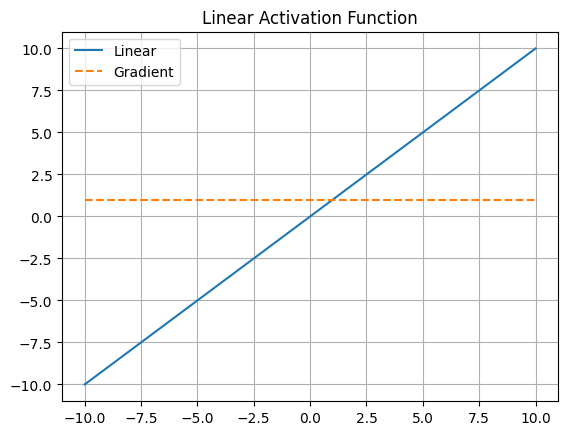

In [4]:
def linear_fn(x):
    return x, tf.ones_like(x)

y, dy = linear_fn(x)

plt.figure()
plt.plot(x, y, label="Linear")
plt.plot(x, dy, '--', label="Gradient")
plt.title("Linear Activation Function")
plt.legend()
plt.grid(True)
plt.show()

## Rectified Linear Unit (ReLU) Activation Function

### Formula
The Rectified Linear Unit (ReLU) is one of the most popular activation functions. It returns the input directly if it is positive, otherwise, it returns zero. Its formula is:

$f(x) = \max(0, x)$

And its derivative (gradient) is:

$f'(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x < 0 \\ \text{undefined} & \text{if } x = 0 \end{cases}$

In practice, the derivative at $x=0$ is often set to 0 or 1.

### Characteristics
*   **Non-linear:** Allows neural networks to learn complex relationships.
*   **Computationally efficient:** Simple to compute compared to sigmoid or tanh functions, as it only involves a thresholding operation.
*   **Mitigates vanishing gradient problem:** For positive inputs, the gradient is always 1, which helps in preventing gradients from vanishing during backpropagation, especially in deep networks.
*   **Sparsity:** Can lead to sparse activations, as neurons output 0 for negative inputs. This can make the network lighter and potentially faster.
*   **Dying ReLU problem:** A disadvantage is that for negative inputs, the gradient is 0, which means that once a neuron outputs 0, it can stop learning completely if it never receives a positive input again. This is known as the 'dying ReLU' problem.

### Use Cases
*   **Hidden layers in deep learning models:** Widely used in the hidden layers of convolutional neural networks (CNNs) and other deep neural networks due to its computational efficiency and ability to mitigate vanishing gradients.
*   **Computer vision tasks:** Highly effective in image recognition and processing tasks.
*   **Natural Language Processing (NLP):** Also used in various NLP models.

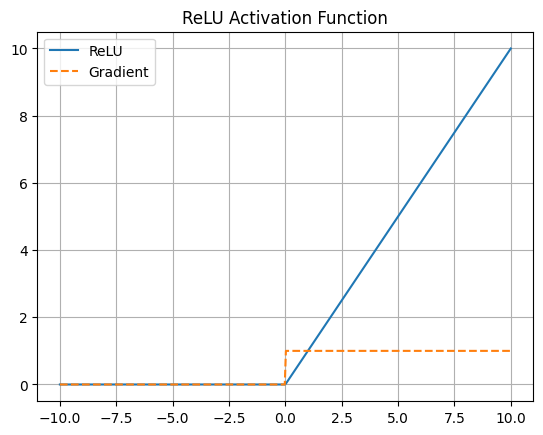

In [5]:
def relu_fn(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = tf.nn.relu(x)
    dy = tape.gradient(y, x)
    return y, dy

y, dy = relu_fn(x)

plt.figure()
plt.plot(x, y, label="ReLU")
plt.plot(x, dy, '--', label="Gradient")
plt.title("ReLU Activation Function")
plt.legend()
plt.grid(True)
plt.show()


## Sigmoid Activation Function

### Formula
The Sigmoid activation function, also known as the logistic function, squashes its input into a range between 0 and 1. Its formula is:

$f(x) = \frac{1}{1 + e^{-x}}$

And its derivative (gradient) is:

$f'(x) = f(x)(1 - f(x))$

### Characteristics
*   **Non-linear:** Introduces non-linearity into the network, allowing it to learn complex patterns.
*   **Output range (0, 1):** The output is always between 0 and 1, which makes it suitable for binary classification problems where the output can be interpreted as a probability.
*   **Smooth gradient:** The gradient is smooth and non-zero everywhere, which is beneficial for gradient-based optimization.
*   **Vanishing gradient problem:** A significant drawback is that for very large positive or negative inputs, the gradient becomes very small (approaching 0). This can lead to the 'vanishing gradient' problem, where updates to the network weights become negligible during backpropagation, slowing down or halting learning in deep networks.

### Use Cases
*   **Output layer in binary classification:** Primarily used in the output layer of neural networks for binary classification tasks (e.g., predicting 'yes' or 'no', 'true' or 'false').
*   **Logistic Regression:** Forms the basis of logistic regression models.
*   **Not commonly used in hidden layers of deep networks:** Due to the vanishing gradient problem, it's rarely used in hidden layers of deep neural networks anymore, being largely replaced by ReLU and its variants.

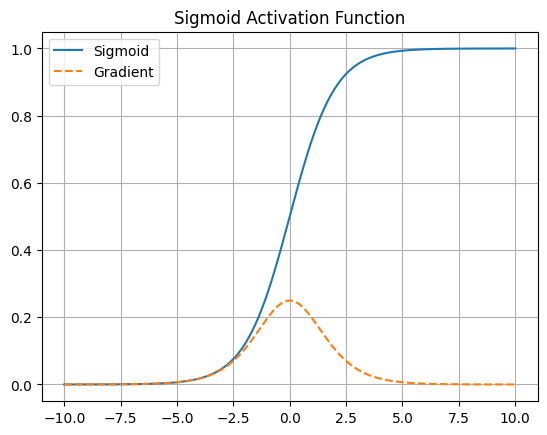

In [6]:
def sigmoid_fn(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = tf.nn.sigmoid(x)
    dy = tape.gradient(y, x)
    return y, dy

y, dy = sigmoid_fn(x)

plt.figure()
plt.plot(x, y, label="Sigmoid")
plt.plot(x, dy, '--', label="Gradient")
plt.title("Sigmoid Activation Function")
plt.legend()
plt.grid(True)
plt.show()


## Hyperbolic Tangent (Tanh) Activation Function

### Formula
The Tanh activation function, or Hyperbolic Tangent function, is similar to the Sigmoid function but squashes its input into a range between -1 and 1. Its formula is:

$f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

And its derivative (gradient) is:

$f'(x) = 1 - (f(x))^2$

### Characteristics
*   **Non-linear:** Introduces non-linearity, allowing the network to learn complex relationships.
*   **Output range (-1, 1):** The output is always between -1 and 1, which is zero-centered. This can be advantageous as it makes the gradients more stable during backpropagation compared to sigmoid, where gradients are always positive.
*   **Smooth gradient:** Similar to sigmoid, it has a smooth, non-zero gradient everywhere.
*   **Vanishing gradient problem:** Although zero-centered, Tanh still suffers from the vanishing gradient problem for very large positive or negative inputs, as the gradient approaches 0 in these regions. However, it generally converges faster than sigmoid.

### Use Cases
*   **Hidden layers:** Tanh is often preferred over Sigmoid for hidden layers due to its zero-centered output, which helps with gradient flow.
*   **Recurrent Neural Networks (RNNs):** Commonly used in RNNs and Long Short-Term Memory (LSTM) networks.
*   **Shallow neural networks:** Can be effective in shallow networks, but in very deep networks, ReLU and its variants are generally favored to mitigate vanishing gradients more effectively.

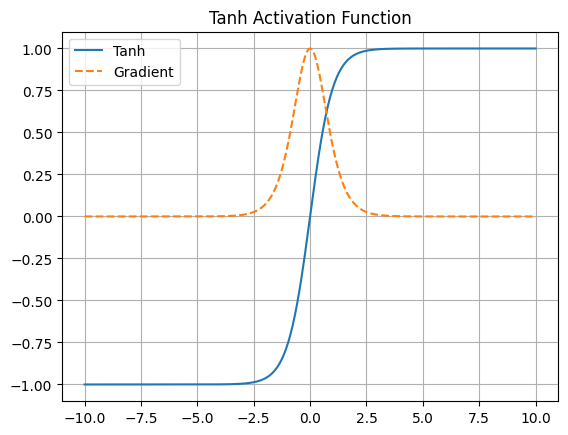

In [7]:
def tanh_fn(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = tf.nn.tanh(x)
    dy = tape.gradient(y, x)
    return y, dy

y, dy = tanh_fn(x)

plt.figure()
plt.plot(x, y, label="Tanh")
plt.plot(x, dy, '--', label="Gradient")
plt.title("Tanh Activation Function")
plt.legend()
plt.grid(True)
plt.show()


## Softmax Activation Function

### Formula
The Softmax activation function is used in the output layer of a neural network for multi-class classification problems. It squashes a K-dimensional vector of arbitrary real values to a K-dimensional vector of real values, where each entry is in the range (0, 1), and all entries sum to 1. This allows for the interpretation of the output as probabilities.

$f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}$

Unlike other activation functions that operate independently on each input, Softmax considers the entire input vector. Its derivative is more complex and usually involves the Jacobian matrix, but for a simplified understanding of its behavior in typical neural network applications, we often focus on the output probabilities.

### Characteristics
*   **Probability Distribution:** Outputs a probability distribution over multiple classes. Each output value is between 0 and 1, and the sum of all outputs is 1.
*   **Non-linear:** Introduces non-linearity, allowing the network to learn complex classification boundaries.
*   **Exponentiation:** The use of exponents ensures that all output values are positive.
*   **Competitive:** The output of one class is dependent on the outputs of all other classes, making it competitive (increasing one probability necessarily decreases others).

### Use Cases
*   **Multi-class classification:** Primarily used in the output layer of neural networks for tasks where an input needs to be classified into one of several mutually exclusive classes (e.g., image classification into \"cat\", \"dog\", or \"bird\").
*   **Language modeling:** Can be used in language models to predict the probability of the next word in a sequence.

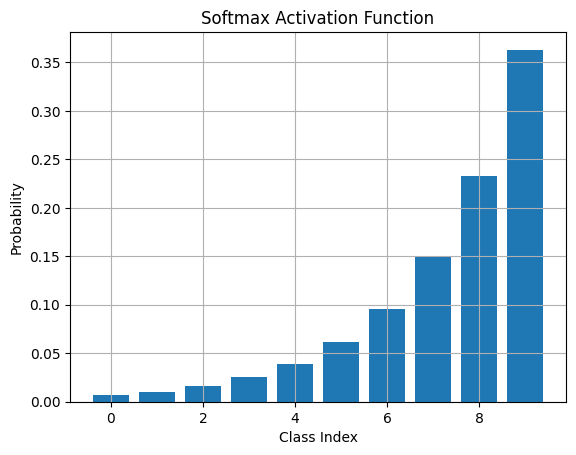

In [8]:
def softmax_fn(x):
    return tf.nn.softmax(x)

x_soft = tf.linspace(-2.0, 2.0, 10)
y = softmax_fn(x_soft)

plt.figure()
plt.bar(range(len(y)), y.numpy())
plt.title("Softmax Activation Function")
plt.xlabel("Class Index")
plt.ylabel("Probability")
plt.grid(True)
plt.show()
